In [123]:
import sys, os, os.path
from scipy.io import wavfile
import scipy.signal
import pandas as pd
from math import *
import codecs

import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import hilbert

import sympy
import numpy as np
from numpy.fft import rfft, rfftfreq, irfft
plt.style.use("seaborn-whitegrid")
from scipy.signal import butter, sosfilt, sosfreqz

In [124]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

In [125]:
def selectfiles():
    files = []
    for file in os.listdir():
        if file.endswith('.txt'):
            files.append(file)
    return files

In [126]:
def sd_file(f):
            
    input_filename = f

    doc = codecs.open(input_filename)
    print(f +' Load is Done! \n')
    df = pd.read_csv(doc, sep = '\t')
    df = df.iloc[:,:4]
    
    return df

In [265]:
def plot_csv(file, srate, w=100000):
        
    df = sd_file(file)
    samplePoints = float(df.shape[0])

    signalDuration =  df.shape[0] / srate
   
    dataX = df.iloc[w:,1] #mySound[:,0]
    dataY = df.iloc[w:,2]
    dataZ = df.iloc[w:,3]

    timeArray = np.arange(0, samplePoints, 1)
    timeArray = timeArray / srate
    print(len(timeArray))

    timeArray = timeArray[w:] * 1000
    plt.plot(timeArray/1000, dataX)
    plt.show()
    plt.plot(timeArray/1000, dataY)
    plt.show()
    plt.plot(timeArray/1000, dataZ)
    plt.show()

    mySoundLength = len(timeArray)
 
    #fftArray = fft(mySound)
    fftArrayX = rfft(dataX)
    fftArrayY = rfft(dataY)
    fftArrayZ = rfft(dataZ)
    
    numUniquePoints = np.ceil((mySoundLength + 1) / 2.0)
    fftArrayX = fftArrayX[0:int(numUniquePoints)]
    fftArrayY = fftArrayY[0:int(numUniquePoints)]
    fftArrayZ = fftArrayZ[0:int(numUniquePoints)]

    fftArrayX = np.abs(fftArrayX)
    fftArrayY = np.abs(fftArrayY)
    fftArrayZ = np.abs(fftArrayZ)
    
    fftArrayX = fftArrayX / float(mySoundLength)
    fftArrayY = fftArrayY / float(mySoundLength)
    fftArrayZ = fftArrayZ / float(mySoundLength)

    fftArrayX = fftArrayX **2
    fftArrayY = fftArrayY **2
    fftArrayZ = fftArrayZ **2    
    
    if mySoundLength % 2 > 0: 
        fftArrayX[1:len(fftArrayX)] = fftArrayX[1:len(fftArrayX)] * 2
        fftArrayY[1:len(fftArrayY)] = fftArrayY[1:len(fftArrayY)] * 2
        fftArrayZ[1:len(fftArrayZ)] = fftArrayZ[1:len(fftArrayZ)] * 2

    else: 
        fftArrayX[1:len(fftArrayX) -1] = fftArrayX[1:len(fftArrayX) -1] * 2  
        fftArrayY[1:len(fftArrayY) -1] = fftArrayY[1:len(fftArrayY) -1] * 2
        fftArrayZ[1:len(fftArrayZ) -1] = fftArrayZ[1:len(fftArrayZ) -1] * 2

    freqArray = np.arange(0, numUniquePoints, 1.0) * (srate / mySoundLength);
 
    freqArrayLength = len(freqArray)
#     print ("freqArrayLength =", freqArrayLength)
    # numpy.savetxt("freqData.txt", freqArray, fmt='%6.2f')
     
#     print ("fftArray length =", len(fftArray))
    # numpy.savetxt("fftData.txt", fftArray)
     
    peaksX, _ = scipy.signal.find_peaks(fftArrayX[:270000], height=0.001,distance=200 )
    print('Peaks X are: {}', format(freqArray[peaksX]))
    peaksY, _ = scipy.signal.find_peaks(fftArrayY[:270000], height=0.001,distance=200 )
    print('Peaks Y are: {}', format(freqArray[peaksY]))
    peaksZ, _ = scipy.signal.find_peaks(fftArrayZ[:270000], height=0.001,distance=200 )
    print('Peaks Z are: {}', format(freqArray[peaksZ]))

    plt.figure(1, figsize=(10, 5), dpi=160)
    plt.semilogy(freqArray[:270000], fftArrayX[:270000], color='green')
    plt.plot(freqArray[peaksX], fftArrayX[peaksX], marker ='o', ls='', color='red')
    texts = []
    for x, y, txt in zip(freqArray[peaksX], fftArrayX[peaksX], freqArray[peaksX]):
        texts.append(plt.text(x,y,round(txt,3), bbox=dict(facecolor='gray', alpha=0.3)))
    plt.title('X')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (dB)')
#     plt.savefig(file)
    plt.show()
    
    plt.figure(1, figsize=(10, 5), dpi=160)
    plt.semilogy(freqArray[:270000], fftArrayY[:270000], color='green')
    plt.plot(freqArray[peaksY], fftArrayY[peaksY], marker ='o', ls='', color='red')
    texts = []
    for x, y, txt in zip(freqArray[peaksY], fftArrayY[peaksY], freqArray[peaksY]):
        texts.append(plt.text(x,y,round(txt,3), bbox=dict(facecolor='gray', alpha=0.3)))
    plt.title('Y')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (dB)')
#     plt.savefig(file)
    plt.show()
    
    plt.figure(1, figsize=(10, 5), dpi=160)
    plt.semilogy(freqArray[:270000], fftArrayZ[:270000], color='green')
    plt.plot(freqArray[peaksZ], fftArrayZ[peaksZ], marker ='o', ls='', color='red')
    texts = []
    for x, y, txt in zip(freqArray[peaksZ], fftArrayZ[peaksZ], freqArray[peaksZ]):
        texts.append(plt.text(x,y,round(txt,3), bbox=dict(facecolor='gray', alpha=0.3)))
    plt.title('Z')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (dB)')
#     plt.savefig(file)
    plt.show()
    
    return freqArray, timeArray, fftArrayX, peaksX, fftArrayY, peaksY, fftArrayZ, peaksZ, dataX, dataY, dataZ

In [266]:
def env(u, timeArray):
    absolSign = []
    for sample in u:
        absolSign.append(abs(sample))
    inter = 100
    outp = []
    time = []
    for baseIndex in range(inter, len(absolSign)):
        maximum = 0
        for lookbackIndex in range(inter):
            maximum = max(absolSign[baseIndex - lookbackIndex], maximum)
        
        outp.append(maximum)
        time.append(float(timeArray[absolSign.index(maximum)]))
    return outp, np.array(time)

In [1018]:
def d_ratio(freqArray, timeArray, fftArray, peaks, data, srate=12000):
    
    df = pd.DataFrame()
    fr = []
    dmp = []
    dmp_h = []
    for peak in peaks[:]:
        print ('Freq = ' + str(freqArray[peak]))
        x = freqArray[peak-50:peak+50]
        y = fftArray[peak-50:peak+50]
        y1 = fftArray[peak]/sqrt(2)
        print('y = ',fftArray[peak])
        print('y/sqrt(2) = ', y1)
        idx = np.argwhere(np.diff(np.sign(y - y1)) !=0)
#         print(y)
#         idx1 = np.pad(np.diff(np.array(y>y1).astype(int)), (1,0), 'constant', constant_values = (0,))
#         print(idx1)
#         intersec = [(x[i], y[i]) for i,_ in enumerate(zip(y,y1)) if y[i] == y1[i]]
#         print(intersec)
#         d=y-y1
#         for i in range(len(d)-1):
#             if d[i]==0. or d[i]*d[i+1]<0.:
#                 x_=x[i]
#                 y_=y[i]
#                 print(x_, y_)
###############
#         x1 = x[idx[0]]
#         x2 = x[idx[1]]
#         f1 = y[idx[0]]
#         f2 = y[idx[1]]
#         print(x1,f1)
#         print(x2,f2)
#         d = (x2-x1)/(2*freqArray[peak])*100
# #         print('demp ratio = ',d)
# ###############
#         plt.semilogy(x, y, color='green')

#         plt.plot([x[0],x[-1]], [y1,y1], ls ='--', color='red')
#         plt.plot([x1, x2], [f1, f2], ls = '', marker = 'o')
#         plt.show()
        t1 = 100
        t2 = 200
        dx = butter_bandpass_filter(data,freqArray[peak]-1, freqArray[peak]+1, srate, order=1)
#         hilb_sigX = hilbert(dx)
#         envelX = np.abs(hilb_sigX)
        hb, time = env(dx[::50], timeArray[::50])
        
        plt.semilogy(time/1000, hb)
        plt.axvline(time[t1]/1000, ls='--',c='r')
        plt.axvline(time[t2]/1000, ls='--',c='k')
        plt.show()
        fr.append(freqArray[peak])
#         dmp.append(float(d))
        
        print('time1 = ',time[t1]/1000)
        print('time2 = ',time[t2]/1000)
        lamb = log(hb[t1]/hb[t2])/((time[t2]-time[t1])/1000)
    
#         t1 = 8000
#         t2 = 16000
#         dx = butter_bandpass_filter(data,freqArray[peak]-1, freqArray[peak]+1, srate, order=2)
#         hilb_sigX = hilbert(dx)
#         envelX = np.abs(hilb_sigX)
#         plt.semilogy(timeArray/1000, envelX)
#         plt.axvline(timeArray[t1]/1000, ls='--',c='r')
#         plt.axvline(timeArray[t2]/1000, ls='--',c='k')
#         plt.show()
#         fr.append(freqArray[peak])
# #         dmp.append(float(d))
        
#         print('time1 = ',timeArray[t1]/1000)
#         print('time2 = ',timeArray[t2]/1000)
#         lamb = log(envelX[t1]/envelX[t2])/((timeArray[t2]-timeArray[t1])/1000)
        print(lamb)
        dh = lamb/(2*np.pi*freqArray[peak])
        dmp_h.append(dh*100)
    df['Freq'] = fr
#     df['demp ratio'] = dmp
    df['demp ratio'] = dmp_h
    return df
        

11_13_00.txt Load is Done! 

193877


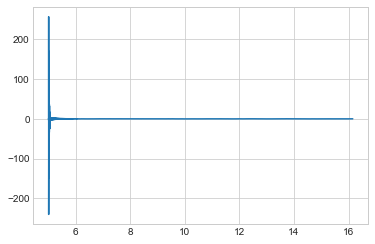

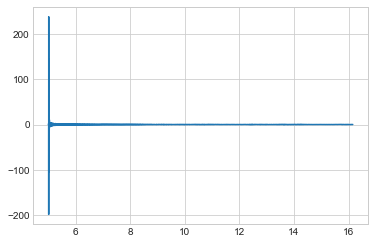

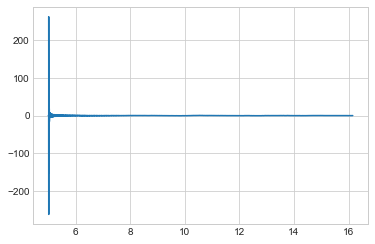

Peaks X are: {} [  86.49730723  391.97173525 1344.69699799]
Peaks Y are: {} [  26.17327846   61.04110489  164.92750809 1128.49854717 1335.82318098]
Peaks Z are: {} [3.58538061e-01 2.61732785e+01 6.10411049e+01 1.65017143e+02
 1.12787111e+03 1.33815368e+03]


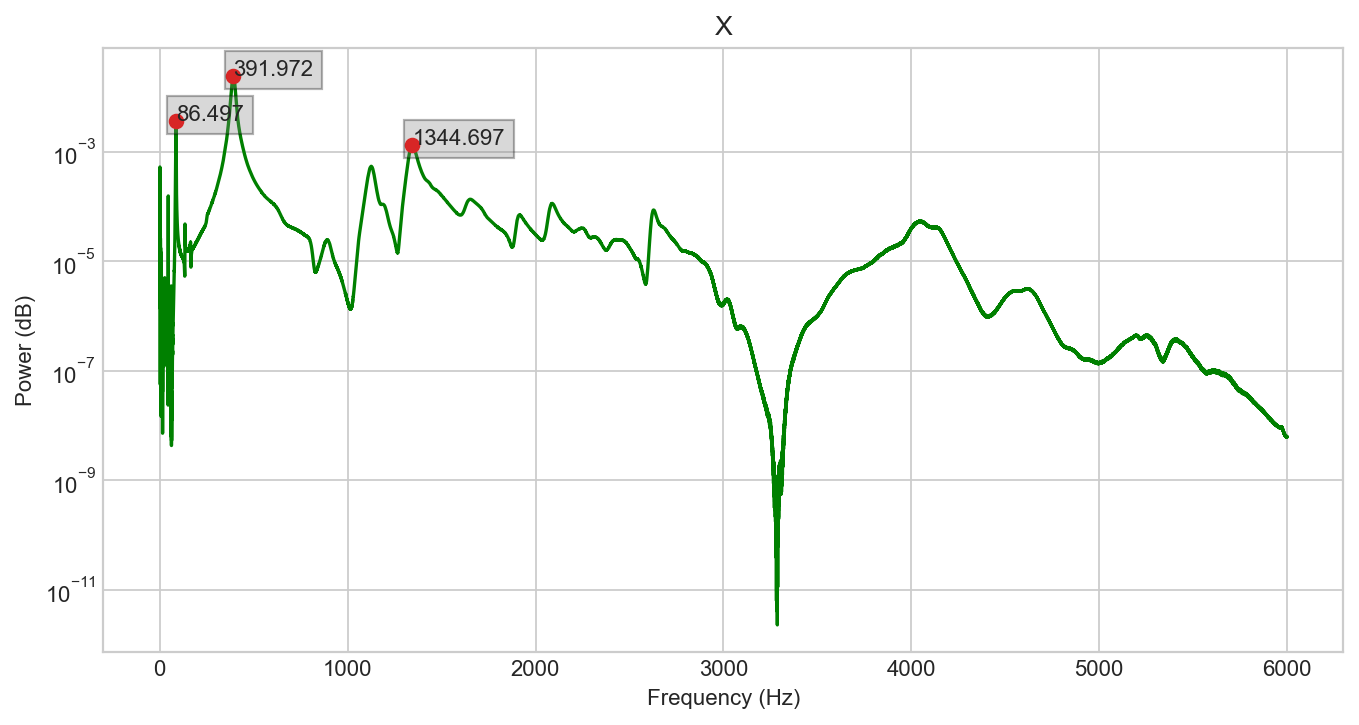

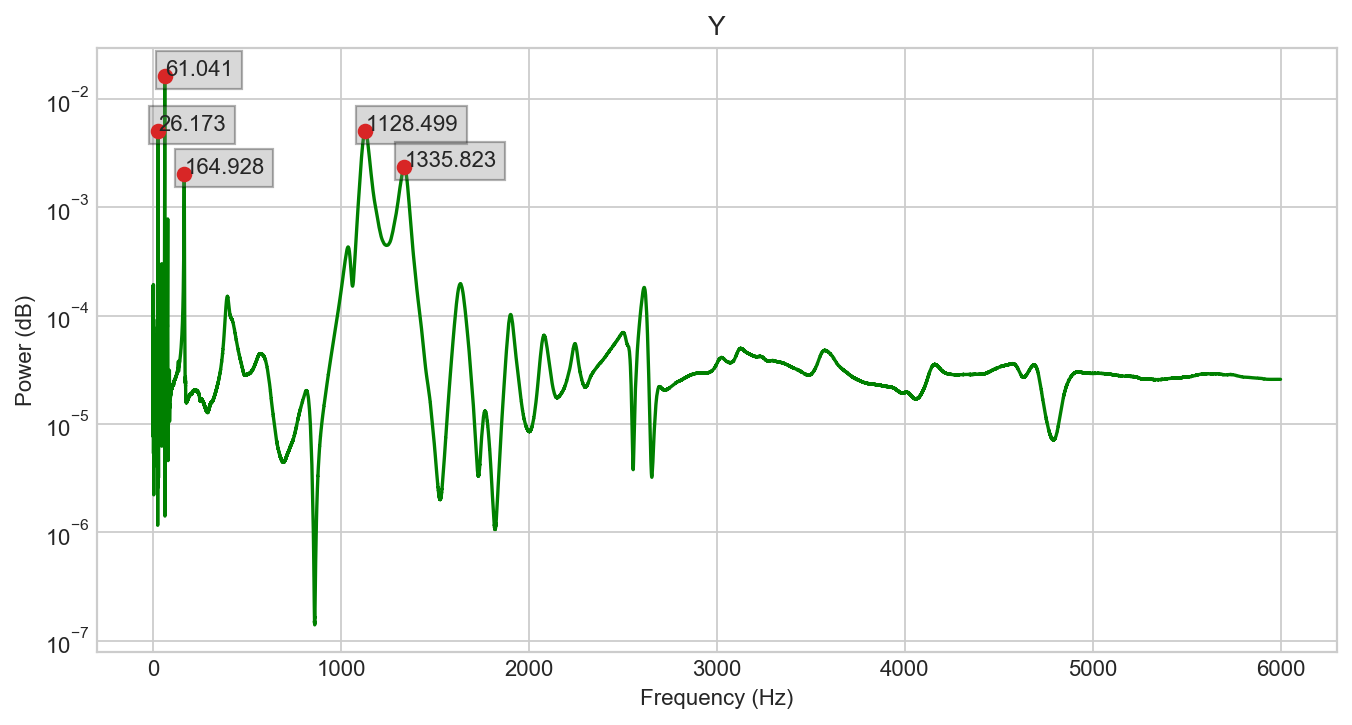

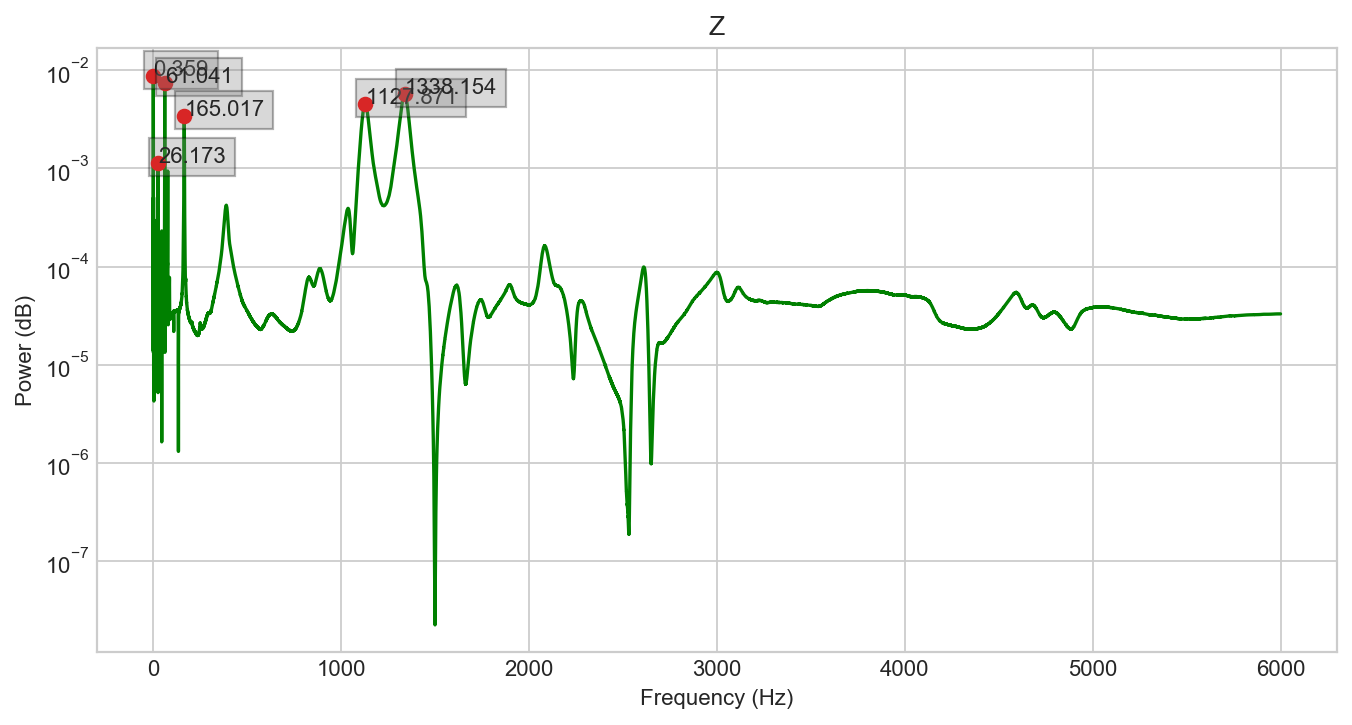

In [1052]:
f = selectfiles()
freqArray, timeArray, fftArrayX, peaksX, fftArrayY, peaksY, fftArrayZ, peaksZ, dataX, dataY, dataZ = plot_csv(f[0],12000, w = 60000)


Freq = 86.49730722977061
y =  0.0036693820251421237
y/sqrt(2) =  0.0025946449127420223


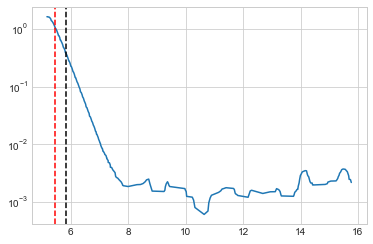

time1 =  5.441666666666666
time2 =  5.845833333333333
2.714237386028659
Freq = 391.97173524952007
y =  0.024326000443900247
y/sqrt(2) =  0.017201079873028827


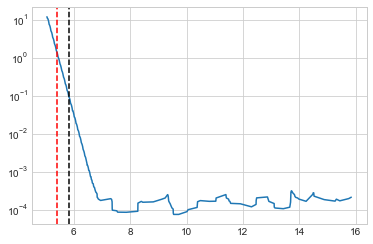

time1 =  5.420833333333333
time2 =  5.841666666666667
6.308474236149359
Freq = 1344.6969979906928
y =  0.0013312685916759218
y/sqrt(2) =  0.0009413490487547093


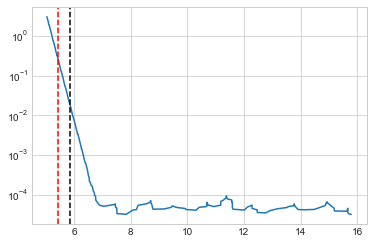

time1 =  5.420833333333333
time2 =  5.845833333333333
6.2858336194313
Freq = 26.17327845709121
y =  0.005088568641892142
y/sqrt(2) =  0.003598161393215154


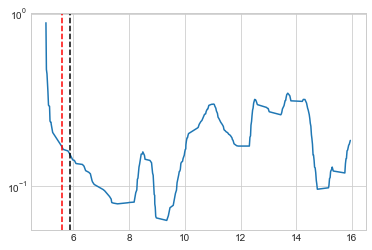

time1 =  5.575
time2 =  5.8625
0.3490694200747172
Freq = 61.04110489479149
y =  0.016451872332630953
y/sqrt(2) =  0.01163323048961869


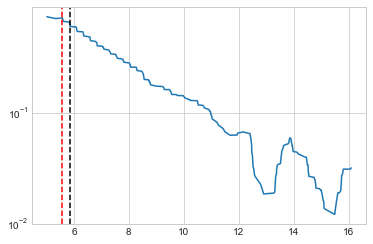

time1 =  5.579166666666667
time2 =  5.841666666666667
0.4066675209821894
Freq = 164.92750808578023
y =  0.0020363675229505833
y/sqrt(2) =  0.0014399292844664098


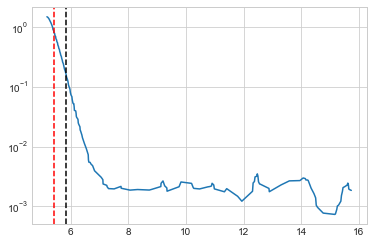

time1 =  5.420833333333333
time2 =  5.841666666666667
3.825659190217543
Freq = 1128.4985471738985
y =  0.005082738932589386
y/sqrt(2) =  0.0035940391662348287


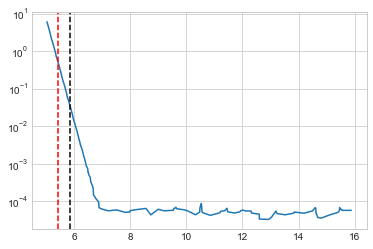

time1 =  5.429166666666666
time2 =  5.841666666666667
6.264788317435658
Freq = 1335.823180979556
y =  0.00236665514807158
y/sqrt(2) =  0.0016734779039314666


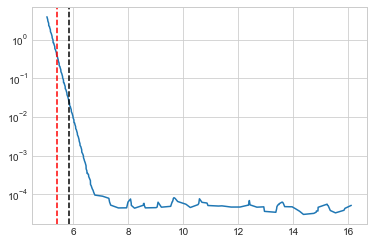

time1 =  5.420833333333333
time2 =  5.8375
6.313220125167911
Freq = 26.17327845709121
y =  0.001135752118747173
y/sqrt(2) =  0.0008030980249131149


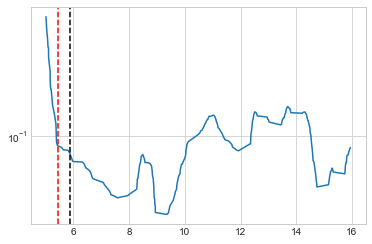

time1 =  5.429166666666666
time2 =  5.8625
0.24903255148893144
Freq = 61.04110489479149
y =  0.0074910050392462705
y/sqrt(2) =  0.005296940461153637


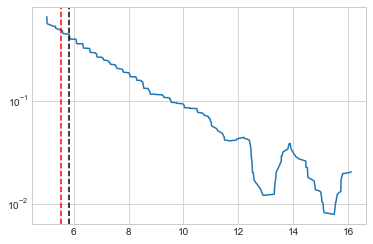

time1 =  5.529166666666667
time2 =  5.841666666666667
0.37909012057600977
Freq = 165.01714260104424
y =  0.003433852017187355
y/sqrt(2) =  0.002428100046944284


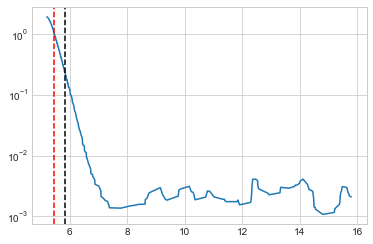

time1 =  5.441666666666666
time2 =  5.841666666666667
3.906195436837792
Freq = 1127.8711055670503
y =  0.00455853598605328
y/sqrt(2) =  0.003223371708021179


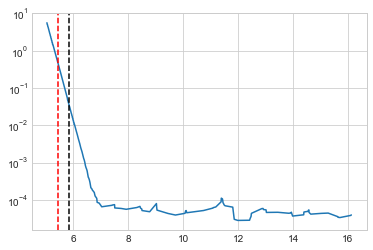

time1 =  5.425
time2 =  5.841666666666667
6.370413056402907
Freq = 1338.1536783764202
y =  0.00573925063943776
y/sqrt(2) =  0.004058263046075669


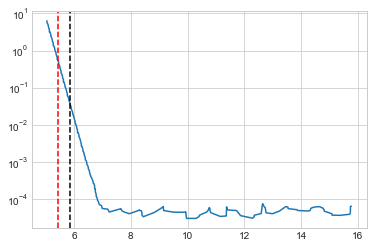

time1 =  5.425
time2 =  5.841666666666667
6.204618108666878


In [1053]:
tblX = d_ratio(freqArray,timeArray, fftArrayX, peaksX[:], dataX)
tblY = d_ratio(freqArray,timeArray, fftArrayY, peaksY[:], dataY)
tblZ = d_ratio(freqArray[:],timeArray, fftArrayZ, peaksZ[1:], dataZ)

In [1054]:
tblX

,Freq,demp ratio
0,86.497307,0.499419
1,391.971735,0.256147
2,1344.696998,0.074398


In [1055]:
tblY

,Freq,demp ratio
0,26.173278,0.212263
1,61.041105,0.106032
2,164.927508,0.369176
3,1128.498547,0.088354
4,1335.823181,0.075218


In [1056]:
tblZ

,Freq,demp ratio
0,26.173278,0.151432
1,61.041105,0.098842
2,165.017143,0.376743
3,1127.871106,0.089893
4,1338.153678,0.073795
